
# FEATURE ENGINEERIG

## It’s the act of extracting important features from raw data and transforming them into formats that are suitable for machine learning .

## To perform feature engineering, a data scientist combines domain knowledge with math and programming skills to  come up with new features that will help a machine learning model perform better.

    

# Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create a dataframe from csv file

In [2]:

df = pd.read_csv("C:\\data_science\\car.csv")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head()


,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Condition
0,ritz,2014,1,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,Good
1,sx4,2013,1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,Good
2,ciaz,2017,1,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,Excellent
3,wagon r,2011,1,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,Good
4,swift,2014,1,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,Good


# Display statistics of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_Name             301 non-null    object 
 1   Year                 301 non-null    int64  
 2   Fitness_Certificate  301 non-null    int64  
 3   Selling_Price        301 non-null    float64
 4   Present_Price        301 non-null    float64
 5   Kms_Driven           300 non-null    float64
 6   Fuel_Type            301 non-null    object 
 7   Seller_Type          300 non-null    object 
 8   Transmission         301 non-null    object 
 9   Owner                299 non-null    float64
 10  Condition            301 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 26.0+ KB


In [4]:
df.describe()

,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,300.000000,299.000000
mean,2013.627907,0.986711,4.661296,7.628472,36903.616667,0.043478
std,2.891554,0.114700,5.082812,8.644115,38944.491364,0.248720
min,2003.000000,0.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,1.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,1.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,1.000000,6.000000,9.900000,48191.750000,0.000000
max,2018.000000,1.000000,35.000000,92.600000,500000.000000,3.000000


# Finding null values

In [5]:
df.isnull().sum()

Car_Name               0
Year                   0
Fitness_Certificate    0
Selling_Price          0
Present_Price          0
Kms_Driven             1
Fuel_Type              0
Seller_Type            1
Transmission           0
Owner                  2
Condition              0
dtype: int64

# IMPUTATION

## In this process we fill the null values according to the data.

### For categorical data like poor avg good excellent we use maximum occurance or mode.
### For numerical data we simply calculate the mean or median of that column and replace the null values with it.

# Handelling null values

In [6]:
#handelling null values
df.update(df["Kms_Driven"].fillna(value=df["Kms_Driven"].mean(),inplace=True))
df.update(df["Seller_Type"].fillna(value=df["Seller_Type"].mode()[0],inplace=True))
df.update(df["Owner"].fillna(value=df["Owner"].mode()[0],inplace=True))
df.isnull().sum()

Car_Name               0
Year                   0
Fitness_Certificate    0
Selling_Price          0
Present_Price          0
Kms_Driven             0
Fuel_Type              0
Seller_Type            0
Transmission           0
Owner                  0
Condition              0
dtype: int64

# BINNING

## Here we basically form a bin or a range where a specific range of continuous numeric values fall into it.

## Applying binning in the year feature

In [7]:

bins = [2000,2005,2010,2015,2020]
labels = [1,2,3,4]
df['year_range'] = pd.cut(df['Year'],bins = bins, labels = labels)
df.head()

,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Condition,year_range
0,ritz,2014,1,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,Good,3
1,sx4,2013,1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,Good,3
2,ciaz,2017,1,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,Excellent,4
3,wagon r,2011,1,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,Good,3
4,swift,2014,1,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,Good,3


# Encoding
 ## ML model require all input and output variable to be numeric , so we have to encode categorical data
 
   ## 1. Label or integer encoding
   ###  Simply convert each column value into a number having no mathematical priority.
   ## 2. Ordinal encoding
   ###  It also do the same but create a ranked ordering between values.

# Convert the categorical data using ordinal encoding

In [8]:

con=['Poor','Average','Good','Excellent']
encoder = OrdinalEncoder(categories=[con])
df[["Condition"]]=encoder.fit_transform(df[["Condition"]])
df.head()

,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Condition,year_range
0,ritz,2014,1,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,2.0,3
1,sx4,2013,1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,2.0,3
2,ciaz,2017,1,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,3.0,4
3,wagon r,2011,1,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,2.0,3
4,swift,2014,1,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,2.0,3


# One Hot Encoding
## In many cases integer encoding may not enough for a machine learning model.

## In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

## Convert the categorical data using one hot encoding encoding

In [9]:
One_Hot_Encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()
df[["S1","S2"]] = One_Hot_Encoder.fit_transform(df[["Seller_Type"]])
df[["F1","F2","F3"]] = One_Hot_Encoder.fit_transform(df[["Fuel_Type"]])
df[["T1","T2"]] = One_Hot_Encoder.fit_transform(df[["Transmission"]])
df.head()

,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Condition,year_range,S1,S2,F1,F2,F3,T1,T2
0,ritz,2014,1,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,2.0,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,sx4,2013,1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,2.0,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,1,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,3.0,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,wagon r,2011,1,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,2.0,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,swift,2014,1,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,2.0,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
df[["Owner","Condition","S1","S2","F1","F2","F3","T1","T2"]] = df[["Owner","Condition","S1","S2","F1","F2","F3","T1","T2"]].dropna().apply(np.int64)
df.head()

,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Condition,year_range,S1,S2,F1,F2,F3,T1,T2
0,ritz,2014,1,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,2,3,1,0,0,0,1,0,1
1,sx4,2013,1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,2,3,1,0,0,1,0,0,1
2,ciaz,2017,1,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,3,4,1,0,0,0,1,0,1
3,wagon r,2011,1,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,2,3,1,0,0,0,1,0,1
4,swift,2014,1,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,2,3,1,0,0,1,0,0,1


In [11]:
df = pd.get_dummies(df,columns=["Seller_Type","Fuel_Type","Transmission"],drop_first=True)
df.head()

,Car_Name,Year,Fitness_Certificate,Selling_Price,Present_Price,Kms_Driven,Owner,Condition,year_range,S1,S2,F1,F2,F3,T1,T2,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,ritz,2014,1,3.35,5.59,27000.0,0,2,3,1,0,0,0,1,0,1,0,0,1,1
1,sx4,2013,1,4.75,9.54,43000.0,0,2,3,1,0,0,1,0,0,1,0,1,0,1
2,ciaz,2017,1,7.25,9.85,6900.0,0,3,4,1,0,0,0,1,0,1,0,0,1,1
3,wagon r,2011,1,2.85,4.15,5200.0,0,2,3,1,0,0,0,1,0,1,0,0,1,1
4,swift,2014,1,4.60,6.87,42450.0,0,2,3,1,0,0,1,0,0,1,0,1,0,1


In [12]:
#Drop the unnecessary features
df.drop(columns=["Car_Name","Year","Fitness_Certificate","S1","S2","F1","F2","F3","T1","T2"],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Condition,year_range,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,27000.0,0,2,3,0,0,1,1
1,4.75,9.54,43000.0,0,2,3,0,1,0,1
2,7.25,9.85,6900.0,0,3,4,0,0,1,1
3,2.85,4.15,5200.0,0,2,3,0,0,1,1
4,4.60,6.87,42450.0,0,2,3,0,1,0,1


# Feature Scaling

## Feature scaling is applied to indipendent variables or features of data to normalize the data within a particular range .

# Normalization (Min-Max Scaling)

##  In this approach we will scale down the values of the features between 0 to 1 .

#  Standardization (Z-Score Normalization)

## Here all the features will be transfored in such a way that it will have the properties of standard normal distribution with mean = 0 and standard deviation = 1 

In [13]:
# transform data
scaler = MinMaxScaler()
df[["Selling_Price","Present_Price","Kms_Driven","Owner","Condition","year_range"]] = scaler.fit_transform(df[["Selling_Price","Present_Price", "Kms_Driven","Owner","Condition","year_range"]])
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Condition,year_range,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,0.093123,0.057109,0.053053,0.0,0.666667,0.666667,0,0,1,1
1,0.133238,0.099913,0.085085,0.0,0.666667,0.666667,0,1,0,1
2,0.204871,0.103273,0.012813,0.0,1.000000,1.000000,0,0,1,1
3,0.078797,0.041504,0.009409,0.0,0.666667,0.666667,0,0,1,1
4,0.128940,0.070980,0.083984,0.0,0.666667,0.666667,0,1,0,1


# Outliers
##  An outlier is a data point that’s significantly different from the remaining data.

## Detecting Outliers

### Simply by Sorting the data
### Using visualization plots like boxplot and scatterplot
### Inter Quartile Range
### Using a normal distribution (mean and std): In a normal distribution, about 99.7% of the data lie within three            standard deviations of the mean. Consequently, if any observation is more than three times the standard            deviation, it’s possible that it’s an outlier

##  Handling Outlier

### Dropping the row containing Outlier data
### Imputation with Mean or Median or mask it with lower bound or upper bound

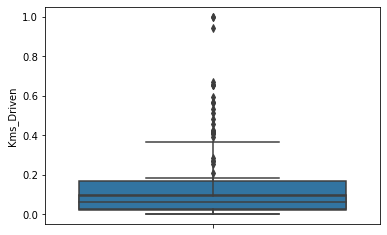

In [14]:
sns.boxplot(data=df)
sns.boxplot(y=df['Kms_Driven'])
plt.show()

# Calculate the boundaries using 1.5 * IQR method

In [15]:
IQR = df["Kms_Driven"].quantile(0.75) - df["Kms_Driven"].quantile(0.25)
print(IQR)
lower = df["Kms_Driven"].quantile(0.25) - (IQR * 1.5)
upper = df["Kms_Driven"].quantile(0.75) + (IQR * 1.5)
print(lower,upper)


0.06606606606606606
-0.07007007007007006 0.19419419419419418


#  Using mean +/- 3 * Standard Deviation

In [151]:
#mean=np.mean(df["Kms_Driven"])
#sd=np.std(df["Kms_Driven"])
#upper=mean+3*sd
#lower = mean-3*sd
#print(lower,upper)

In [16]:
outliers = np.where(df["Kms_Driven"] > upper,True, np.where(df["Kms_Driven"] < lower, True, False))
print("Outliers")
print(outliers)
print(df.loc[(outliers)])

Outliers
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False

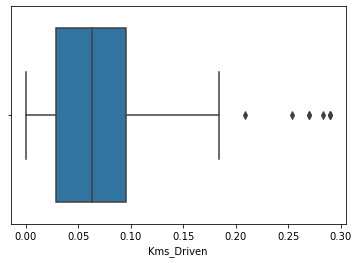

In [154]:
#df1=df.copy()
#df.loc[df["Kms_Driven"]>=0.29,"Kms_Driven"]=0.29
sns.boxplot(x=df['Kms_Driven'])
plt.show()

# Remove outliers from data.

In [159]:

#df = df.loc[~(outliers)]
#sns.boxplot(x=df['Kms_Driven'])
#plt.show()

# Masking with lower and upper bound

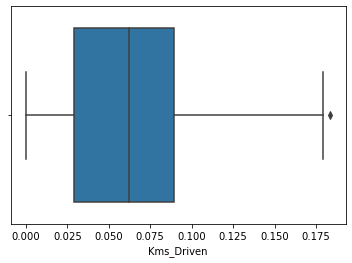

In [161]:
df["Kms_Driven"] = np.where(df["Kms_Driven"] >upper, df["Kms_Driven"].quantile(0.90),df["Kms_Driven"])
df["Kms_Driven"] = np.where(df["Kms_Driven"] <lower, df["Kms_Driven"].quantile(0.10),df["Kms_Driven"])
sns.boxplot(x=df['Kms_Driven'])
plt.show()

# Feature Selection

## Here we have to select those attributes which best explain the relationship of an indipendent vriable with the target variable

# Correlation Coefficient

## Correlation is a measure of the linear relationship of 2 or more variables. 
## Through correlation, we can predict one variable from the other. 
## The logic behind using correlation for feature selection is that the good variables are highly correlated with the target but uncorrelated among themselves.

# Correlation Coefficient using Heatmap after processing the Data

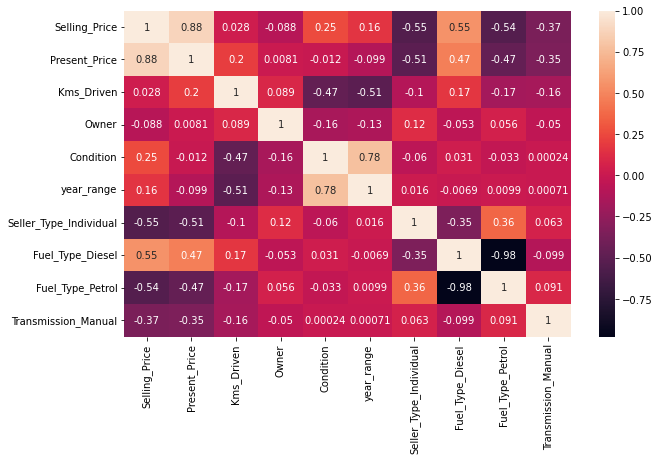

In [17]:
cor= df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)
plt.show()